# BLUESKY

This notebook demos the webscraping and analysis abilities of BLUESKY.
BLUESKY is a Python package that returns information about vehicle prices.

In [1]:
# IMPORT STATEMENTS
from BLUESKY.scrapers.bs4_scraper import scrape_data_payload
from BLUESKY.scrapers.genurls import gen_cars_com_urls
from BLUESKY.stats.clean import calc_pct_deltas, sort_trims

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Generating Target URLS to scrape from

In [2]:
car_dict = {
    #"ford": ["mustang", "f_150"],
    "toyota": ["camry", "supra"],
    "bmw": ["330", "z4", "430", "m340", "m440",],
    "audi": ["a4", "s4", "s3", "a5", "s5"]
    #"acura": ["integra"],

}

url_targets = gen_cars_com_urls(input_dict=car_dict)


In [3]:
temp = scrape_data_payload(url_targets)

Processing the scraped data

In [4]:
columns = ["make", "model", "model_year", "trim", "mileage", "price", "listing_id", "bodystyle", ] 

df = pd.DataFrame(temp, columns=columns)

In [5]:
scraped_results = {}
cat_model_list = []
for make in car_dict.keys():
    for model in car_dict[make]:
        filt = (df["make"]==make) & (df["model"]==model)
        scraped_results[make+"_"+model] = df[filt]


In [6]:
%%capture --no-stdout --no-display

m340 = scraped_results["bmw_m340"]
m440 = scraped_results["bmw_m440"]
a4 = scraped_results["audi_a4"]
s3 = scraped_results["audi_s3"]
camry = scraped_results["toyota_camry"]

m440_mod = sort_trims(m440)
#a4 = sort_trims(a4)
camry = sort_trims(camry,spec="se")
trims, counts = np.unique(np.array(camry["trim"]),return_counts=True)
for e in zip(trims,counts):
    print(e)

m340 = calc_pct_deltas(m340)
m440 = calc_pct_deltas(m440)
a4 = calc_pct_deltas(a4)
s3 = calc_pct_deltas(s3)
camry = calc_pct_deltas(camry)

('se', 63)


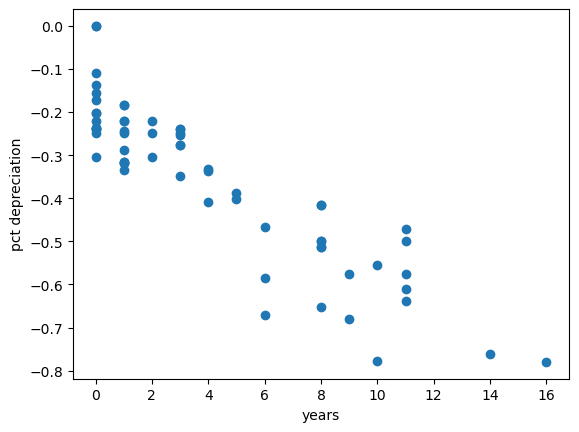

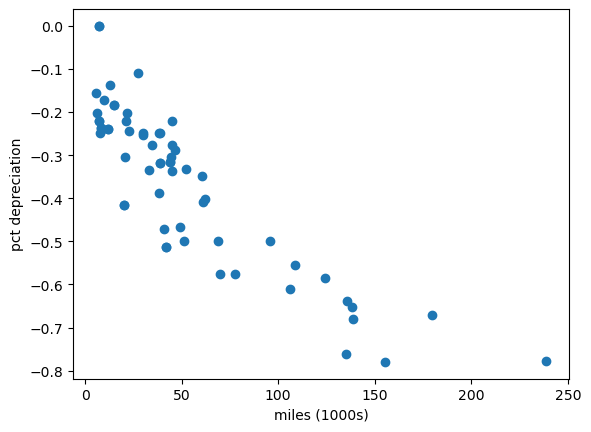

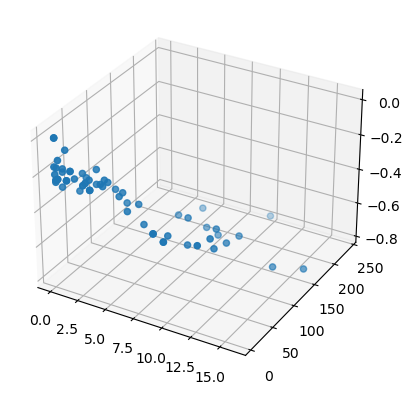

In [7]:
plt.figure(1)
plt.scatter(camry["year_delta"], camry["price_pct"])
plt.xlabel("years")
plt.ylabel("pct depreciation")

plt.figure(2)
plt.scatter(camry["mileage"].values.astype(float)/1000, camry["price_pct"])
plt.xlabel("miles (1000s)")
plt.ylabel("pct depreciation")

plt.figure(3)
ax = plt.axes(projection ="3d")
ax.scatter3D(camry["year_delta"], camry["mileage"].values.astype(float)/1000, camry["price_pct"])



In [11]:
from scipy.optimize import curve_fit
import scipy.stats as stats

In [38]:
def exp_decay(x,A,B,C):
    """Models exponential decay.

    Args:
        x: independant variable
        A: A
        B: B
        C: C
        
    Returns:
        dependant variable
    """
    return A*np.exp(-B*x) - C

y=a4["price_pct"]
x=a4["mileage"].values.astype(float)/1000

popt, pcov = curve_fit(exp_decay,x,y,p0=[1,1,1])

C:\Users\wujor\AppData\Local\Temp\ipykernel_2408\3073965258.py:13: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x) - C


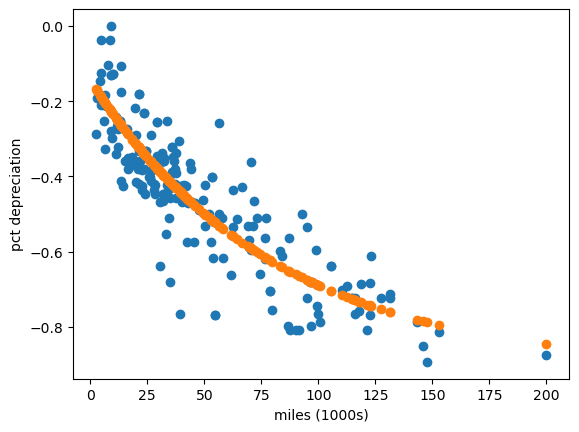

In [39]:
plt.figure(2)
plt.scatter(a4["mileage"].values.astype(float)/1000, a4["price_pct"])
plt.xlabel("miles (1000s)")
plt.ylabel("pct depreciation")

work_price = mileage_func(a4["mileage"].values.astype(float)/1000, popt[0], popt[1], popt[2])

plt.scatter(a4["mileage"].values.astype(float)/1000, work_price)